# **Aprendizaje supervisado**
# SL15. Tarea Final

## <font color='blue'>**Set de Datos Boston Housing**</font>

El objetivo es poder predecir a nivel de negocio, el valor promedio de una propiedad en miles de dólares (US$1000) en la ciudad de Boston y que corresponde a la variable **MEDV**.

Informacion de los atributos   
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:

url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOS      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Visualizaciones con los datos.

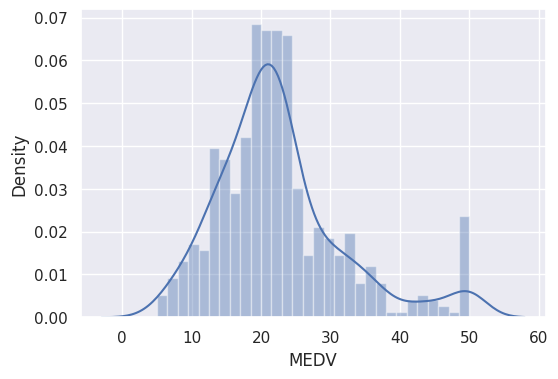

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

<Axes: >

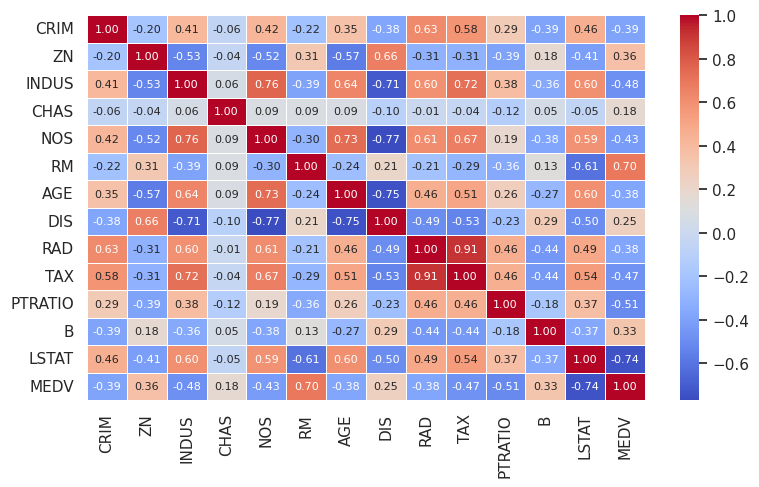

In [ ]:
plt.figure(figsize=(9, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

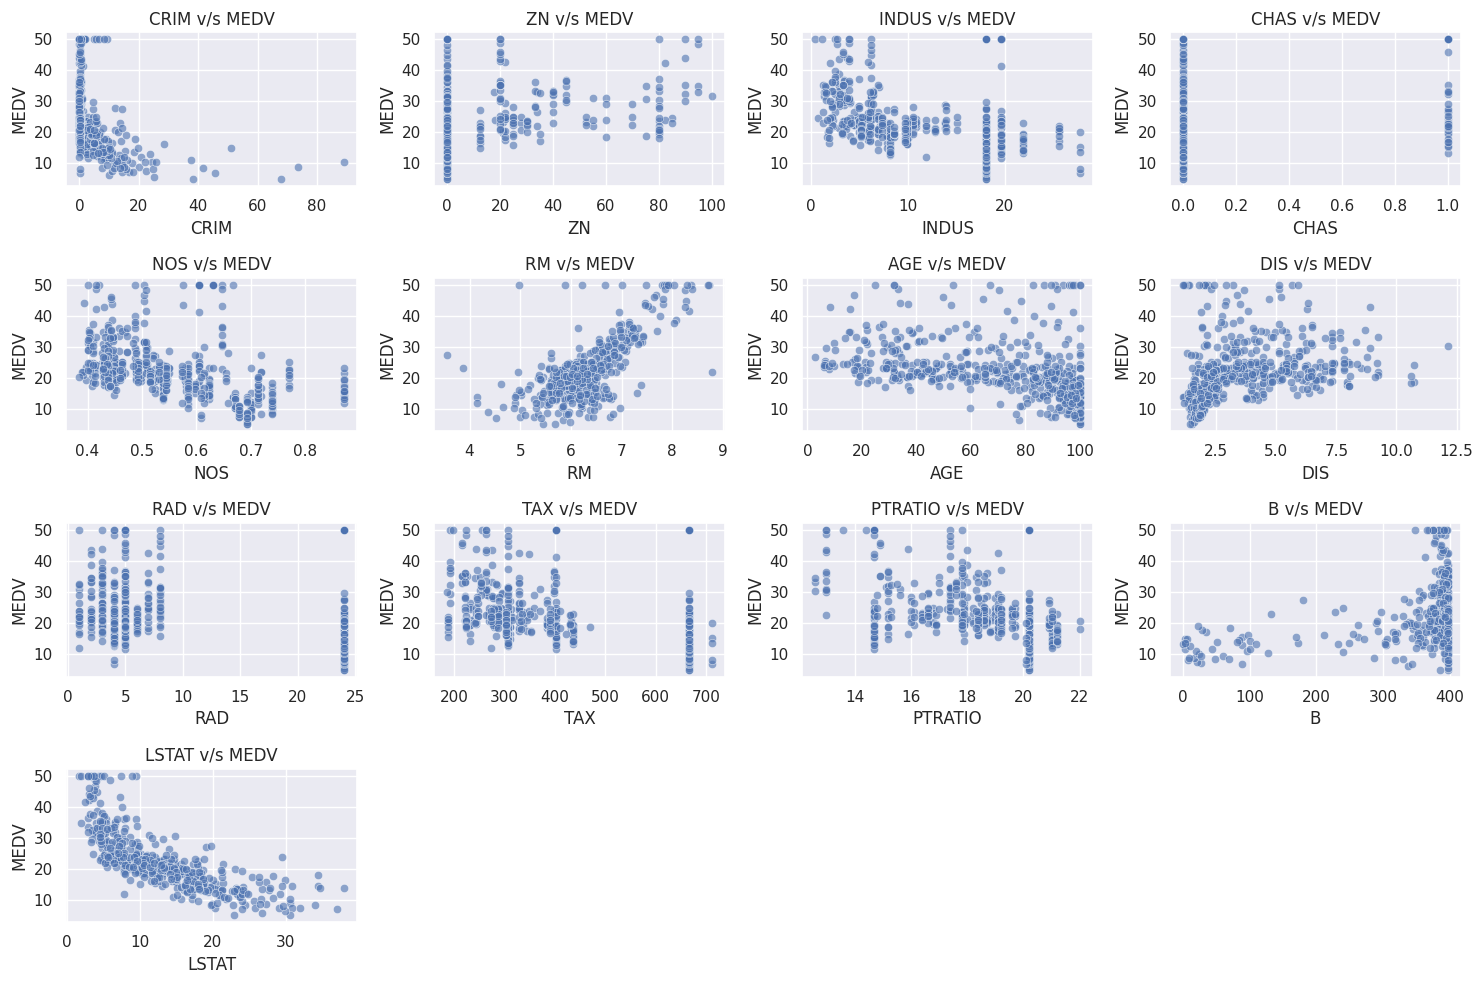

In [ ]:
#Revisamos la variable dependiente versus las demás variables
features = ['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

fig, axes = plt.subplots(4, 4, figsize=(15, 10))

axes = axes.flatten()
for i, var in enumerate(features):
    sns.scatterplot(x=df[var], y=df["MEDV"], alpha=0.6, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("MEDV")
    axes[i].set_title(f"{var} v/s MEDV")

for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Evaluación de modelos

Mejor modelo para Regresión Lineal: {}
Mejor modelo para SVR: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
Mejor modelo para KNN: {'kneighborsregressor__n_neighbors': 2}
Mejor modelo para Random Forest: {'randomforestregressor__max_depth': 20, 'randomforestregressor__n_estimators': 100}
Mejor modelo para Gradient Boosting: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__n_estimators': 100}

Métricas de los Modelos:
              Modelo       MAE        MSE      RMSE  VarScore
0   Regresión Lineal  3.162710  21.517444  4.638690  0.711226
1                SVR  2.161857  13.293228  3.645988  0.821599
2                KNN  2.708553  15.748289  3.968411  0.788651
3      Random Forest  2.085641   9.645064  3.105650  0.870559
4  Gradient Boosting  2.051780   8.131552  2.851588  0.890871


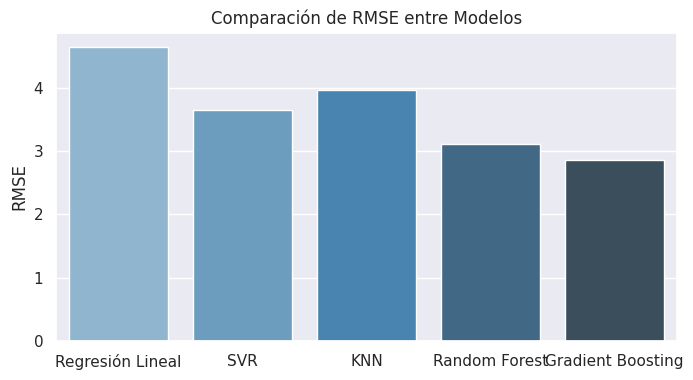

In [ ]:
# Definir nuestra variables independientes y objetivo
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Separamos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos hiperparametro para encontrar los mejores con Gridsearch
grids = {
    'Regresión Lineal': {
        'model': LinearRegression(),
        'params': {}  # No necesita parámetros adicionales
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'svr__kernel': ['linear', 'rbf'],
            'svr__C': [0.1, 1, 10],
            'svr__epsilon': [0.01, 0.1, 0.2]
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'kneighborsregressor__n_neighbors': list(range(1, 21))
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'randomforestregressor__n_estimators': [50, 100, 200],
            'randomforestregressor__max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'gradientboostingregressor__n_estimators': [50, 100, 200],
            'gradientboostingregressor__learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

best_models = {}
for name, config in grids.items():
    pipe = make_pipeline(StandardScaler(), config['model'])  #Utilizamos Standar debido a que hay modelos que lo necesitan
    grid_search = GridSearchCV(pipe, config['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Mejor modelo para {name}: {grid_search.best_params_}")

model_metrics = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    var_score = r2_score(y_test, y_pred)

    model_metrics.append({
        'Modelo': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'VarScore': var_score
    })

# DataFrame con las métricas
metrics_df = pd.DataFrame(model_metrics)

print("\nMétricas de los Modelos:")
print(metrics_df)

# Visualizar el RMSE de todos los modelos con seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Modelo', y='RMSE', data=metrics_df, palette='Blues_d')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre Modelos')
plt.xlabel('')
plt.show()

Gradient Boosting y Random Forest destacaron como los mejores modelos, mostrando un excelente desempeño en todas las métricas, siendo mejor Gradient Boosting que logró el mejor equilibrio entre precisión y error.

SVR mostró buenos resultados, aunque no alcanzó el nivel de Gradient Boosting o Random Forest, sigue siendo una opción válida, particularmente cuando se manejan datos de alta dimensionalidad.

KNN tuvo un rendimiento intermedio, con un RMSE alto en comparación con los modelos anteriores.

Regresión Lineal fue el modelo con el peor rendimiento en comparación con los otros, con un MAE y RMSE significativamente más altos.

En resumen, analizando las métricas podemos concluir que los 3 mejores modelos es primero Gradient Boosting, luego Random Forest y SVR.

## <font color='blue'>**Set de Datos Fake News**</font>

Este proyecto utiliza el dataset Fake and Real News Dataset para desarrollar un algoritmo capaz de identificar noticias falsas ("fake news") y noticias reales ("real news").

**Referencias**

*   Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
*   Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).



**Objetivos y Metodología**

Realizar un análisis descriptivo del dataset proporcionado en el archivo Dataset_fakenews.zip.

Preparar y transformar los datos para su uso en algoritmos de clasificación de texto.

Evaluar múltiples modelos de clasificación revisados en clases, aplicando técnicas de optimización de hiperparámetros.

Implementar validación cruzada (5 folds) y reportar el F1-score promedio obtenido en 20 corridas experimentales para asegurar la robustez del modelo.

Presentar visualizaciones que apoyen el análisis y las conclusiones del proyecto.




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-and-real-news-dataset


In [ ]:
import pandas as pd
Fake_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
True_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

#Le damos a las fake el valor de 0 y a las True el valor de 1
Fake_df['label'] = 0
True_df['label'] = 1


In [ ]:
#Juntamos ambas dataframes
df = pd.concat([Fake_df, True_df]).sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Función para limpiar texto
def clean_text(text):
    text = text.lower()  # a minúsculas
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # quitar puntuación
    text = re.sub(r"\d+", "", text)  # quitar números
    text = re.sub(r"\s+", " ", text)  # quitar espacios extras
    return text.strip()

# Aplicar limpieza al texto
df["text_clean"] = df["text"].apply(clean_text)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df["text_clean"])
y = df["label"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"🔍 Resultados para: {nombre}")
    print(classification_report(y_test, y_pred, target_names=["Fake", "True"]))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


Ahora entrenamos los modelos:


Naive Bayes

🔍 Resultados para: Naive Bayes
              precision    recall  f1-score   support

        Fake       0.95      0.94      0.94      4696
        True       0.93      0.94      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



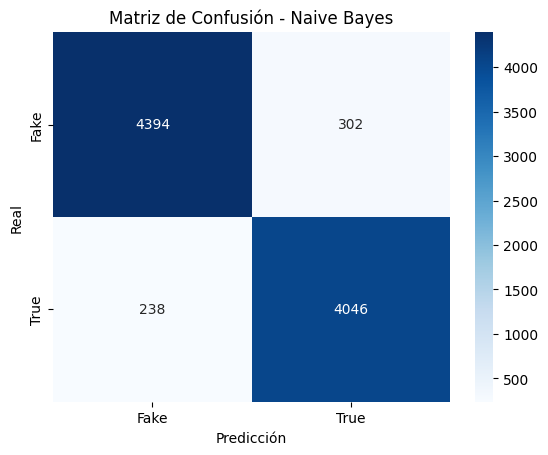

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
evaluar_modelo(nb_model, "Naive Bayes")

SVM

🔍 Resultados para: SVM (LinearSVC)
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4696
        True       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



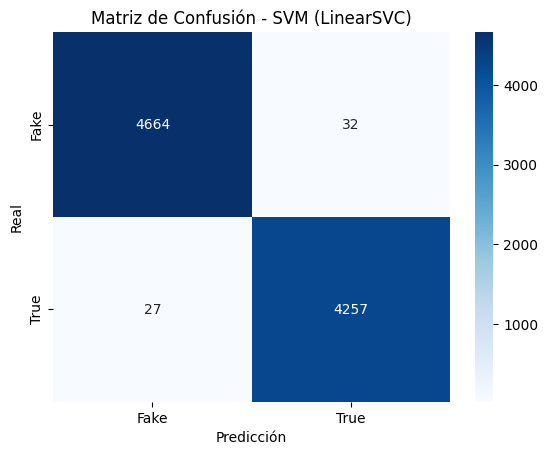

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
evaluar_modelo(svm_model, "SVM (LinearSVC)")

Random Forest

🔍 Resultados para: Random Forest
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4696
        True       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



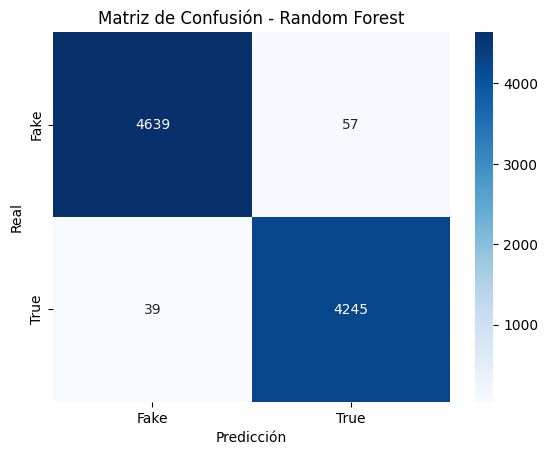

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluar_modelo(rf_model, "Random Forest")

K-Nearest Neighbors


🔍 Resultados para: K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

        Fake       0.59      0.99      0.74      4696
        True       0.97      0.25      0.40      4284

    accuracy                           0.64      8980
   macro avg       0.78      0.62      0.57      8980
weighted avg       0.77      0.64      0.58      8980



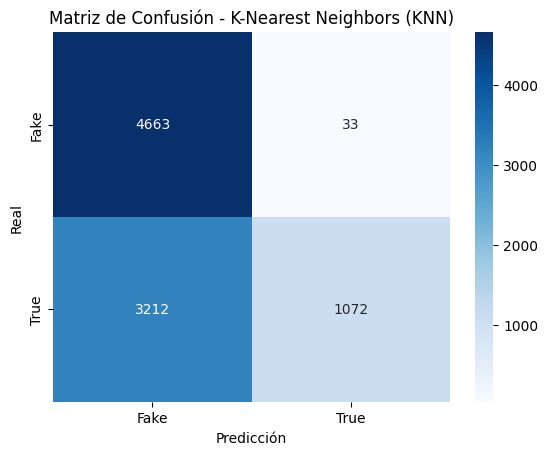

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluar_modelo(knn_model, "K-Nearest Neighbors (KNN)")

Gradient Boosting

🔍 Resultados para: Gradient Boosting
              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4696
        True       0.99      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



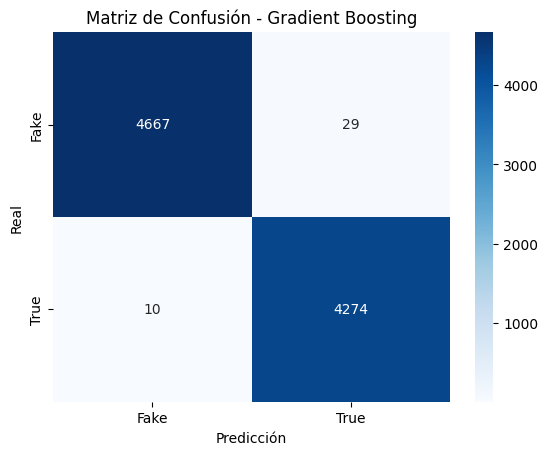

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
evaluar_modelo(gb_model, "Gradient Boosting")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenamiento de modelos
nb_model = MultinomialNB().fit(X_train, y_train)
svm_model = LinearSVC().fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42).fit(X_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42).fit(X_train, y_train)

# Evaluación
modelos_entrenados = {
    "Naive Bayes": nb_model,
    "SVM (LinearSVC)": svm_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model,
    "Gradient Boosting": gb_model
}

resultados = []
for nombre, modelo in modelos_entrenados.items():
    y_pred = modelo.predict(X_test)
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

df_resultados = pd.DataFrame(resultados).sort_values(by="F1 Score", ascending=False)
print(df_resultados)

                Modelo  Accuracy  Precision    Recall  F1 Score
4    Gradient Boosting  0.994989   0.991649  0.997899  0.994764
1      SVM (LinearSVC)  0.993430   0.992539  0.993697  0.993118
2        Random Forest  0.944098   0.978492  0.902661  0.939048
0          Naive Bayes  0.939866   0.930543  0.944444  0.937442
3  K-Nearest Neighbors  0.638641   0.970136  0.250233  0.397847


Luego de evaluar cinco modelos de clasificación para detectar noticias verdaderas y falsas. Gradient Boosting fue el más destacado, logrando un excelente balance entre precisión y recall, ideal para este tipo de tareas críticas aplicando modelos de verificación automática de noticias. Por otro lado, SVM (LinearSVC) también mostró alto rendimiento, siendo especialmente eficiente en textos con alta dimensionalidad como los representados con TF-IDF.

Random Forest obtuvo buenos resultados en precisión, aunque su recall fue ligeramente inferior. Naive Bayes, demostró ser sorprendentemente efectivo, rápido y adecuado para implementaciones ligeras o en tiempo real.

K-Nearest Neighbors no resultó adecuado para este problema debido a su bajo desempeño en contextos con datos textuales de alta dimensión, como los generados por TF-IDF.

En resumen, Gradient Boosting o SVM tuvieron los mejores resultados para este tipo de aplicación y generación de soluciones robustas, Naive Bayes como opción rápida y eficiente, y evitar KNN en este tipo de tareas de clasificación textual.